In [87]:
import yaml
import utils_logger as logging
from loader import construct_loader
import utils_distributed as du
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

anno_path = '/home/kaihua/datasets/kinetics400-anno/'

In [88]:
# ============================================================================
# generate logger
logger = logging.custom_logger(output_path='./')


# ============================================================================
# load config
logger.info('=====> Load config from setting.yaml')
with open('setting.yaml') as f:
    config = yaml.full_load(f)
    
# ============================================================================
# upgrade config
config['data']['path_to_anno_dir'] = anno_path

=====> Load config from setting.yaml


In [97]:
# Set up environment.
# Set random seed from configs.
np.random.seed(config['rng_seed'])
torch.manual_seed(config['rng_seed'])


# ============================================================================
# construct dataloader
train_loader = construct_loader(config, 'train', logger)
first_batch = train_loader.dataset[0]

Constructing Kinetics train...
Constructing kinetics dataloader (size: 218371) from /home/kaihua/datasets/kinetics400-anno/output_train.csv


In [98]:
def print_image(torch_img):
    img = torch_img * torch.FloatTensor([0.225, 0.225, 0.225]).view(3,1,1) + torch.FloatTensor([0.45, 0.45, 0.45]).view(3,1,1)
    img = img.permute(1,2,0)
    img = np.uint8((img * 255).numpy())
    img = Image.fromarray(img)
    fig = plt.figure()
    plt.imshow(img)
    plt.axis('off')  # clear x- and y-axes

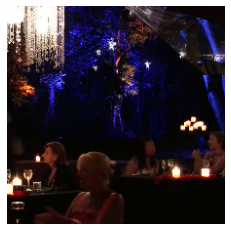

In [99]:
print_image(first_batch[0][0][:,0,:,:])

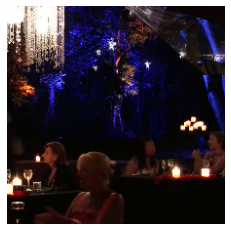

In [100]:
print_image(first_batch[0][0][:,2,:,:])

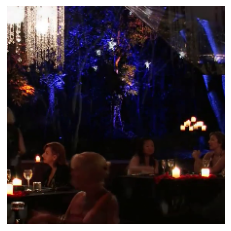

In [101]:
print_image(first_batch[0][0][:,4,:,:])

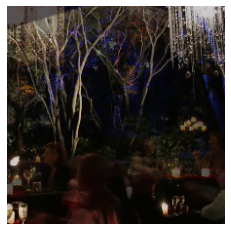

In [102]:
print_image(first_batch[0][0][:,6,:,:])

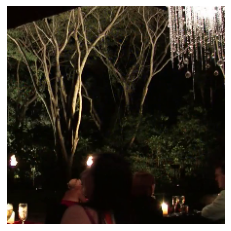

In [103]:
print_image(first_batch[0][0][:,7,:,:])